# Mobile Subscribers Penetration
Data provided by the [World Bank](datacatalog.worldbank.org).
Looking into each country's mobile subscriber penetration and trying to find out:  
  
** 1. Which country has the highest/lowest overall penetration?**  
** 2. Which country has the highest/lowest rising mobile subscription penetration?**  
** 3. Are there any countries where a decline is visible?**  
** 4. Anything else that comes to mind. **

Now loading usefull libraries.

In [1]:
library(ggplot2)
library(Amelia)
library(gridExtra)

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


## 1. Loading and preprocessing the dataset

### 1.1 Loading the data

In [2]:
df <- data.frame(read.csv("1_DC_R_Data/Mobile cellular subscriptions.csv"))

### 1.2 Getting the structure of the data.

In [3]:
str(df)

'data.frame':	264 obs. of  62 variables:
 $ Country.Name  : Factor w/ 264 levels "Afghanistan",..: 11 1 6 2 5 8 250 9 10 4 ...
 $ Country.Code  : Factor w/ 264 levels "ABW","AFG","AGO",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Indicator.Name: Factor w/ 1 level "Mobile cellular subscriptions (per 100 people)": 1 1 1 1 1 1 1 1 1 1 ...
 $ Indicator.Code: Factor w/ 1 level "IT.CEL.SETS.P2": 1 1 1 1 1 1 1 1 1 1 ...
 $ X1960         : int  0 0 0 0 0 0 NA 0 0 0 ...
 $ X1961         : logi  NA NA NA NA NA NA ...
 $ X1962         : logi  NA NA NA NA NA NA ...
 $ X1963         : logi  NA NA NA NA NA NA ...
 $ X1964         : logi  NA NA NA NA NA NA ...
 $ X1965         : int  0 0 0 0 0 0 NA 0 0 0 ...
 $ X1966         : logi  NA NA NA NA NA NA ...
 $ X1967         : logi  NA NA NA NA NA NA ...
 $ X1968         : logi  NA NA NA NA NA NA ...
 $ X1969         : logi  NA NA NA NA NA NA ...
 $ X1970         : int  0 0 0 0 0 0 NA 0 0 0 ...
 $ X1971         : logi  NA NA NA NA NA NA ...
 $ X1972         : logi  N

From the structure of the dataset we can see that before 1992 there is no point at looking at the data as there are no mobile subscribers. Let us visualy inspect the missing data by a missmap.

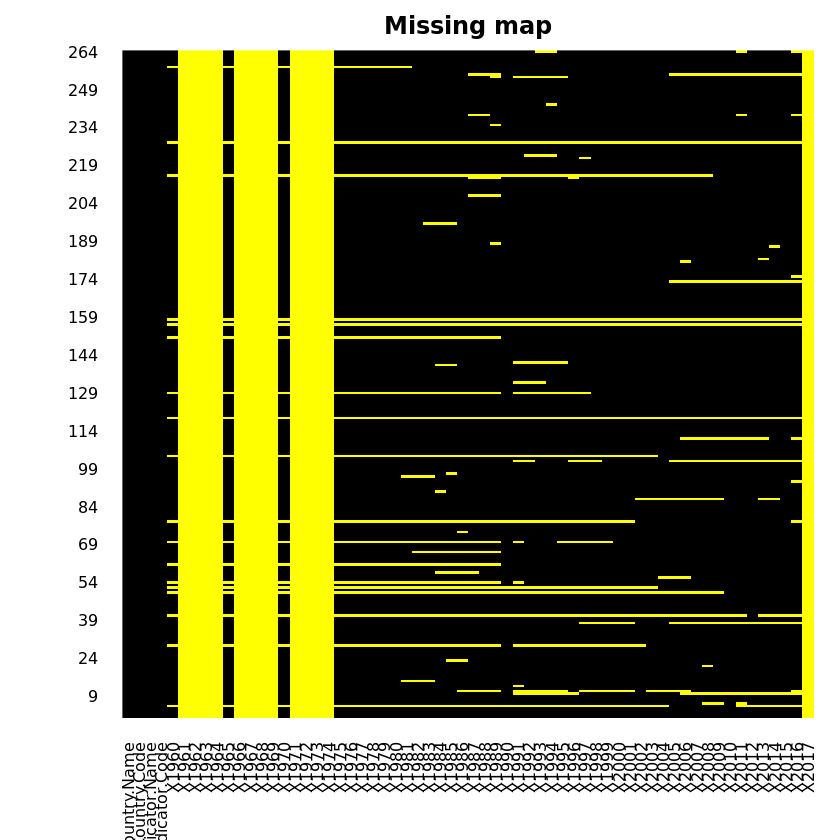

In [4]:
missmap(df, main='Missing map', col = c('yellow', 'black'), legend=F, rank.order=F)

As it can be seen from the missmap there are countries with data completely missing, as well as some years being completely blank. In addition the structure of the dataframe shows us that until the 1992 there are zeros. To accurately get the starting year I will sum all of the rows for each year.

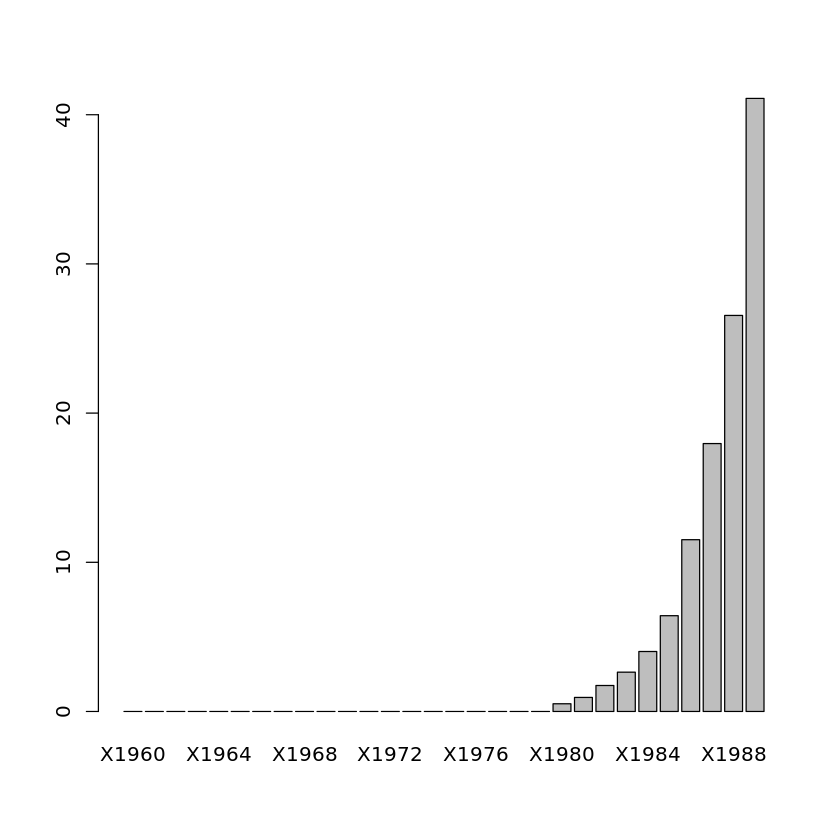

In [5]:
d <- df # First copy the dataframe
d[is.na(d)] <- 0 # Replace NA with 0 in the temporary dataset
mobile.all <- colSums(d[,5:ncol(d)]) # Do the sum
barplot(mobile.all[0:30]) # and the simple bar plot, not throughout the whole period.

The plot gives us the information that the earliest date is 1980. Thus we don't need anything below that date. In addition it seems 2017 is completely missing. Thus we can disregard it.

In [6]:
cols.drop = c(names(df)[5:24], 'X2017')# column vector to drop
df.new <- df[,!(names(df) %in% cols.drop)] # dropping

Let's run *'missmap'* again to see what remains.

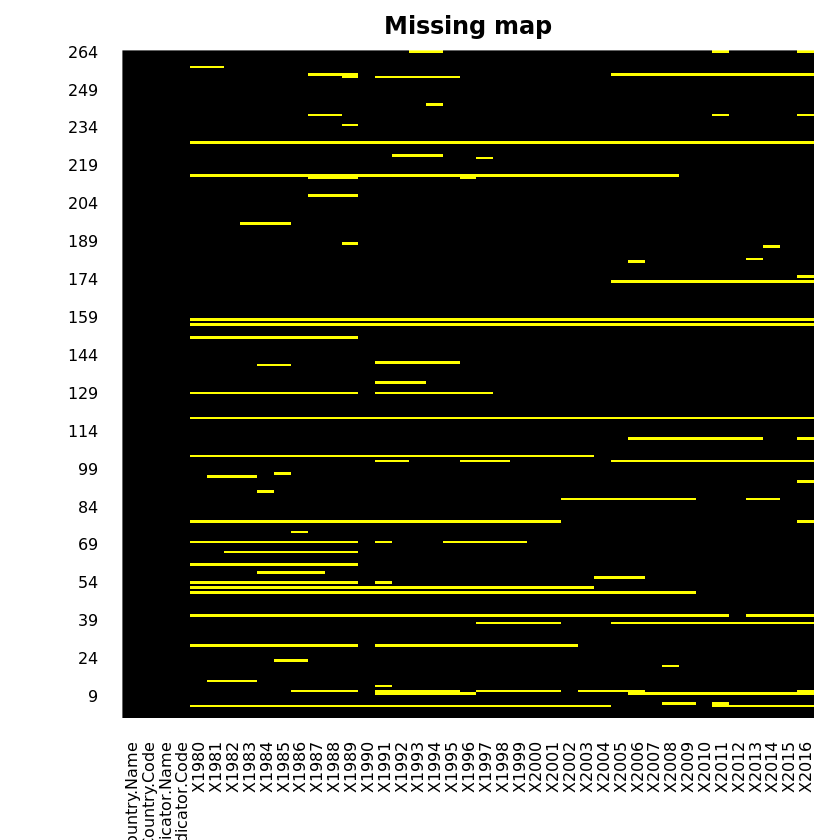

In [7]:
missmap(df.new, main='Missing map', legend=F, col = c('yellow', 'black'), rank.order=F)

### 1.3 Dealing with the missing data.

Before we go over the questions that were defined up top we have to deal with the missing data. By examining the *missmap* above we can see that a couple of countries have no records at all. I think it is safe to assume that we can drop these countries completely. In addition we can see, based on the plot of the number of mobile phones, what kind of trend we can see in the global mobile subscription penetration. Then we can see at key years, let's say every 5, the distribution globally by country. If we find any pattern to the data we can fill in the blanks. Let's put it in a list so we can easily track progress.

1. Drop the countries that have no data at all.
2. Examine the global trend.
3. See the distribution for key years, to see if any distribution can be seen.

#### 1.3.1 Droping the countries with no data.

In [8]:
df.new$na_count <- apply(df.new, 1, function(x) sum(is.na(x)))
missing.countries <- df.new$Country.Code[df.new$na_count == 37]
df.new <- df.new[!(df.new$Country.Code %in% missing.countries),] 

#### 1.3.2 Examining the global trend.

I think it safe to reuse the plot from above, just expanding it.

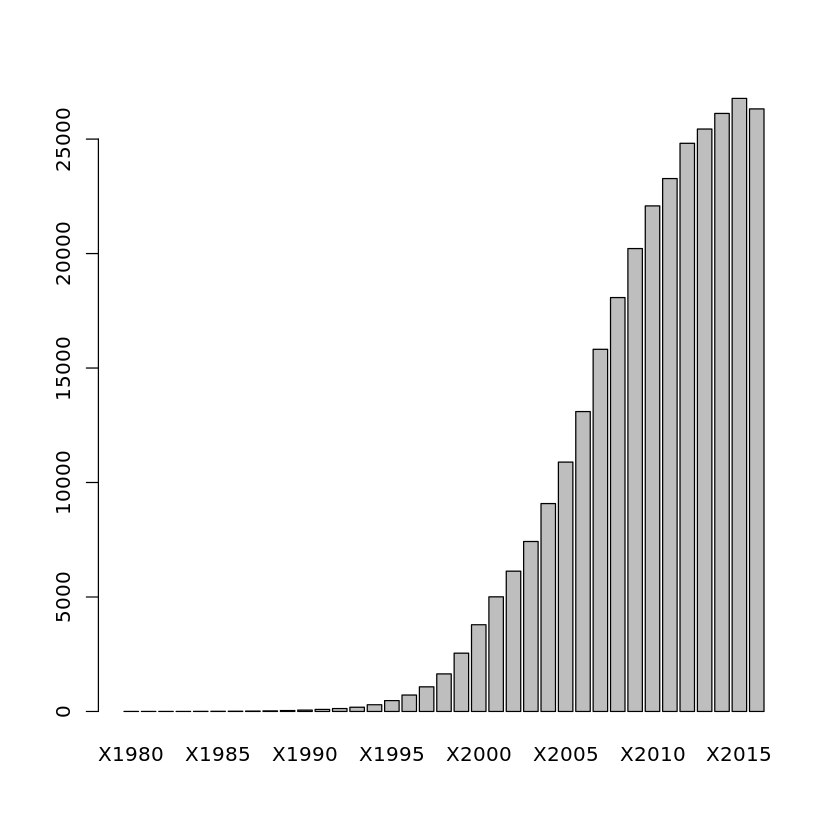

In [9]:
barplot(mobile.all[22:length(mobile.all)-1])

Examining the global trend sees that we see a rise in mobile subscriptions right until 2015 followed by a slight decline in 2016. That means an increase in the subscriptions of each country shall be expected. 

#### 1.3.3 Examining the distributions per country for some key years.
Starting wiht 1980, we can take a look at the distributions for each year - for a 5 year period - say 1980, 1985, 1990, 1995 and so on.

Lets start with 1980. Since a lot of the countries will be zeros they will be filtered out.

Warning message:
“Removed 14 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_point).”

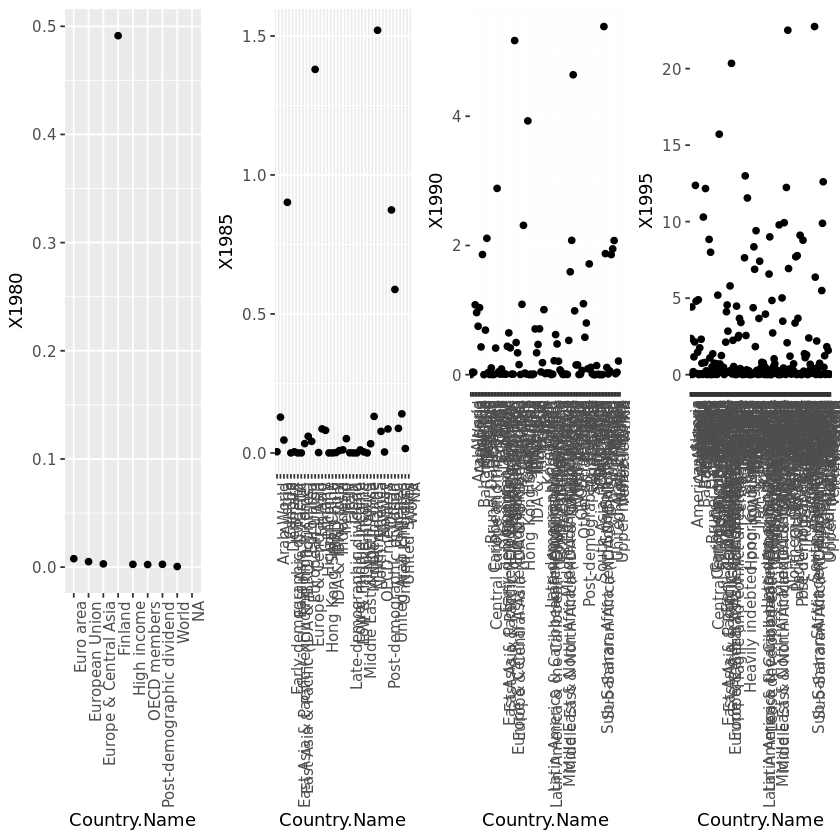

In [10]:
# 1980
df.eighty <- df.new[df.new$X1980 > 0,c('Country.Name', 'X1980')]
pl1 <- ggplot(df.eighty, aes(Country.Name, X1980)) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# 1985
df.eightyfive <- df.new[df.new$X1985 > 0,c('Country.Name', 'X1985')]
pl2 <- ggplot(df.eightyfive, aes(Country.Name, X1985)) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# 1990
df.ninety <- df.new[df.new$X1990 > 0,c('Country.Name', 'X1990')]
pl3 <- ggplot(df.ninety, aes(Country.Name, X1990)) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# 1995
df.ninetyfive <- df.new[df.new$X1995> 0,c('Country.Name', 'X1995')]
pl4 <- ggplot(df.ninetyfive, aes(Country.Name, X1995)) + geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
# Total Plot
grid.arrange(pl1, pl2, pl3, pl4, nrow=1)

It seems that in 1980 Finland led the way to mobile communications, but the world followed through in the next periods.

For imputing the missing values I see two ways to go ahead:
1. Treat each year as a truncated normal distribution and infer the samples from there.
2. Cluster each country, based on their most predominant quantile, on each year's performance. Then based on this infer the values. When ties occur - take the higher quantile. The reason behind this is the global trend of increasing mobile subscriptions.

Method for evaluation: t.b.d.

In [11]:
# 1 Truncated Normal Placeholder

** Method 2. Quantile Clusters**

In [22]:
quantile(df.new$X1981, 0.25, na.rm=T)
quantile(df.new$X1981, 0.5, na.rm=T)
quantile(df.new$X1981, 0.75, na.rm=T)

25% 
  0

50% 
  0

75% 
  0

In [38]:
clnames <- colnames(df.new)

for (col in clnames[5:41]) {
    print(unname(quantile(df.new[,col], 0.25, na.rm=T)))
}

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0.008339786
[1] 0.02811719
[1] 0.06874688
[1] 0.1239421
[1] 0.2397417
[1] 0.5658415
[1] 1.12032
[1] 2.232183
[1] 3.548794
[1] 6.551637
[1] 11.32037
[1] 18.8764
[1] 26.14852
[1] 34.34523
[1] 46.90582
[1] 57.38599
[1] 66.83958
[1] 68.75405
[1] 71.87261
[1] 75.1016
[1] 80.09404
[1] 81.4168


In [31]:
length(clnames)

[1] 42